# Το Είναι και το Τίποτε

---

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr

In [34]:
import pandas as pd
import numpy as np

* Θα χρησιμοποιήσουμε ένα σύνολο δεδομένων που αφορά αξίες οικιών στην Καλιφόρνια.

* Τα δεδομένα προέρχονται από την ακαδημαϊκή εργασία των Pace, R. Kelley και Ronald Barry, Sparse Spatial Autoregressions, Statistics and Probability Letters, 33 (1997) 291-297.

In [35]:
cal_housing = pd.read_csv('cal_housing.csv')
cal_housing

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


* Τα δεδομένα αυτά είναι πλήρη, δεν υπάρχουν κενά.

* Δυστυχώς δεν είναι αυτός ο κανόνας.

* Τις περισσότερες φορές στα δεδομένα που έχουμε στη διάθεσή μας υπάρχουν κενά.

* Όταν σε μία εγγραφή υπάρχει κενό αντί για κάποιον πραγματικό αριθμό, το κενό αναπαρίσταται ως `NaN` (Not a Number).

* Εμείς λοιπόν εδώ ας υποβιβάσουμε την ποιότητα των δεδομένων μας εισάγοντας κενά σε αυτά.

* Θα εισάγουμε κενά στο 75% των γραμμών του `DataFrame` (η μέθοδος προέρχεται από την [τεκμηρίωση του scikit-learn](https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html)).

In [36]:
n_samples, n_features = cal_housing.shape

# Add missing values in 75% of the lines
missing_rate = 0.75
n_missing_samples = int(n_samples * missing_rate)
n_missing_samples

15480

* Φτιάχνουμε έναν πίνακα με τόσα στοιχεία όσες οι γραμμές του `cal_housing` `DataFrame`, με τιμές `False`.

In [37]:
missing_samples = np.zeros(n_samples, dtype=bool)
print(missing_samples.shape, missing_samples)

(20640,) [False False False ... False False False]


* Θα κάνουμε τα πρώτα 75% των στοιχείων του ίσα με `True`.

In [38]:
missing_samples[:n_missing_samples] = True

* Ανακατεύουμε τα στοιχεία του πίνακα, ώστε τα `True` και `False` να είναι διάσπαρτα.

In [39]:
rng = np.random.default_rng(42)
rng.shuffle(missing_samples)

* Για κάθε μία από τις γραμμές στις οποίες θα εισάγουμε ένα κενό, επιλέγουμε τυχαία μία στήλη, της οποίας τα περιεχόμενα θα σβήσουμε.

In [40]:
missing_features = rng.integers(0, n_features, n_missing_samples)
print(missing_features.shape, missing_features)

(15480,) [4 3 1 ... 7 2 1]


* Αλλάζουμε τις τιμές του `cal_housing`, βάζοντας `np.nan` στις επιλεγμένες γραμμές και στήλες.

In [41]:
cal_housing.values[missing_samples, missing_features] = np.nan
cal_housing

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,NaN,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,NaN,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,NaN,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,NaN,5.6431,341300.0
4,NaN,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,NaN,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,NaN,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,NaN,92300.0
20638,-121.32,39.43,NaN,1860.0,409.0,741.0,349.0,1.8672,84700.0


* Το βασικό πράγμα που μπορούμε να κάνουμε όταν έχουμε κενά είναι να διαπιστώσουμε την ύπαρξη της ανυπαρξίας.

* Αν θέλουμε στο pandas να διαπιστώσουμε αν μια τιμή δεν υπάρχει, μπορούμε να χρησιμοποιήσουμε τη μέθοδο `isna()`.

In [42]:
cal_housing['totalRooms'].isna()

0        False
1         True
2        False
3        False
4        False
         ...  
20635    False
20636     True
20637    False
20638    False
20639    False
Name: totalRooms, Length: 20640, dtype: bool

* Συνώνυμο της μεθόδου `isna()` είναι η μέθοδος `isnull()`.

In [43]:
cal_housing['totalRooms'].isnull()

0        False
1         True
2        False
3        False
4        False
         ...  
20635    False
20636     True
20637    False
20638    False
20639    False
Name: totalRooms, Length: 20640, dtype: bool

* Αντιστρόφως, αν θέλουμε να διαπιστώσουμε ότι μια τιμή υπάρχει, μπορούμε να χρησιμοποιήσουμε τη μέθοδο `notna()`.

In [44]:
cal_housing['latitude'].notna()

0         True
1         True
2        False
3         True
4         True
         ...  
20635     True
20636     True
20637     True
20638     True
20639    False
Name: latitude, Length: 20640, dtype: bool

* Συνώνυμη της `notna()` είναι η μέθοδος `notnull()`.

In [45]:
cal_housing['latitude'].notnull()

0         True
1         True
2        False
3         True
4         True
         ...  
20635     True
20636     True
20637     True
20638     True
20639    False
Name: latitude, Length: 20640, dtype: bool

* Αν θέλουμε να μετρήσουμε πόσα κενά υπάρχουν, μπορούμε να αθροίσουμε το αποτέλεσμα της `isna()`, αφού στο άθροισμα οι τιμές `True` γίνονται 1 και οι τιμές `False` γίνονται 0.

In [46]:
cal_housing['latitude'].isna().sum().item()

1680

* Με βάση αυτές τις μεθόδους μπορούμε να φιλτράρουμε τα δεδομένα μας ώστε να μην έχουμε κενά.

In [47]:
cal_housing[cal_housing['medianHouseValue'].notna()]

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,NaN,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,NaN,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,NaN,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,NaN,5.6431,341300.0
4,NaN,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,NaN,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,NaN,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,NaN,92300.0
20638,-121.32,39.43,NaN,1860.0,409.0,741.0,349.0,1.8672,84700.0


* Μια άλλη λύση είναι να πετάξουμε τις γραμμές (εγγραφές) όπου υπάρχουν κενά χρησιμοποιώντας τη μέθοδο `dropna()`.

In [48]:
cal_housing.dropna()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0
11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0
17,-122.27,37.85,52.0,1228.0,293.0,648.0,303.0,2.1202,155500.0
20,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,1.3578,147500.0
21,-122.27,37.85,42.0,1639.0,367.0,929.0,366.0,1.7135,159800.0
...,...,...,...,...,...,...,...,...,...
20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0
20620,-121.48,39.05,40.0,198.0,41.0,151.0,48.0,4.5625,100000.0
20623,-121.37,39.03,32.0,1158.0,244.0,598.0,227.0,2.8235,65500.0
20627,-121.32,39.13,5.0,358.0,65.0,169.0,59.0,3.0000,162500.0


* Το πρόβλημα είναι ότι μια τέτοια προσέγγιση μπορεί να είναι συντριπτική γιατί χάνουμε μεγάλο όγκο των δεδομένων μας.

* Μπορεί να μας επιθυμούμε τελικά να απομακρύνουμε τις γραμμές όπου υπάρχουν κενά μόνο σε συγκεκριμένες στήλες.

In [49]:
cal_housing.dropna(subset=['medianHouseValue', 'medianIncome'])

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,NaN,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,NaN,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,NaN,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,NaN,5.6431,341300.0
4,NaN,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,NaN,2.5495,98300.0
20635,NaN,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,NaN,150.0,356.0,114.0,2.5568,77100.0
20638,-121.32,39.43,NaN,1860.0,409.0,741.0,349.0,1.8672,84700.0


* Αν δεν θέλουμε να πετάξουμε δεδομένα, μπορούμε να μεταλλάξουμε τα δεδομένα μας, δίνοντας μια προκαθορισμένη τιμή όπου υπάρχουν κενά, με τη μέθοδο `fillna()`.

In [50]:
cal_housing.fillna(0)

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,0.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,0.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,0.00,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,0.0,5.6431,341300.0
4,0.00,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,0.00,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,0.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,0.0000,92300.0
20638,-121.32,39.43,0.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


* Αν πάλι δεν θέλουμε να εισάγουμε την προκαθορισμένη τιμή παντού, μπορούμε να επιλέξουμε το υποσύνολο των στηλών στο οποίο θα τη χρησιμοποιήσουμε.

In [51]:
cal_housing[['medianIncome', 'medianHouseValue']].fillna(0)

,medianIncome,medianHouseValue
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
20635,1.5603,78100.0
20636,2.5568,77100.0
20637,0.0000,92300.0
20638,1.8672,84700.0


* Μπορεί η συμπλήρωση των κενών να γίνει και κάπως πιο έξυπνα.

* Για παράδειγμα, αντί για μια προκαθορισμένη τιμή να χρησιμοποιήσουμε το μέσο όρο, ή γενικότερα τιμές που θα προκύψουν από υπολογισμούς.

In [52]:
cal_housing.fillna(cal_housing.mean())

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.230000,37.880000,41.000000,880.000000,539.232767,322.0,126.000,8.325200,452600.0
1,-122.220000,37.860000,21.000000,2641.457729,1106.000000,2401.0,1138.000,8.301400,358500.0
2,-122.240000,35.625127,52.000000,1467.000000,190.000000,496.0,177.000,7.257400,352100.0
3,-122.250000,37.850000,52.000000,1274.000000,235.000000,558.0,499.158,5.643100,341300.0
4,-119.574345,37.850000,52.000000,1627.000000,280.000000,565.0,259.000,3.846200,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-119.574345,39.480000,25.000000,1665.000000,374.000000,845.0,330.000,1.560300,78100.0
20636,-121.210000,39.490000,18.000000,2641.457729,150.000000,356.0,114.000,2.556800,77100.0
20637,-121.220000,39.430000,17.000000,2254.000000,485.000000,1007.0,433.000,3.870723,92300.0
20638,-121.320000,39.430000,28.662049,1860.000000,409.000000,741.0,349.000,1.867200,84700.0


* Αν δεν θέλουμε να το εφαρμόσουμε σε όλο το `DataFrame`, μπορούμε πάλι να επιλέξουμε υποσύνολο στηλών.

In [53]:
cal_housing.fillna(cal_housing.mean()["medianIncome":"medianHouseValue"])

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,NaN,322.0,126.0,8.325200,452600.0
1,-122.22,37.86,21.0,NaN,1106.0,2401.0,1138.0,8.301400,358500.0
2,-122.24,NaN,52.0,1467.0,190.0,496.0,177.0,7.257400,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,NaN,5.643100,341300.0
4,NaN,37.85,52.0,1627.0,280.0,565.0,259.0,3.846200,342200.0
...,...,...,...,...,...,...,...,...,...
20635,NaN,39.48,25.0,1665.0,374.0,845.0,330.0,1.560300,78100.0
20636,-121.21,39.49,18.0,NaN,150.0,356.0,114.0,2.556800,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,3.870723,92300.0
20638,-121.32,39.43,NaN,1860.0,409.0,741.0,349.0,1.867200,84700.0


* Με τη μέθοδο `fillna()` μπορούμε να χρησιμοποιήσουμε και άλλες στρατηγικές για το χειρισμό των κενών.

* Είναι πιο βολικό να τις δούμε με ένα άλλο, μικρότερο και τεχνητό `DataFrame`.

In [54]:
df = pd.DataFrame(
    np.random.randn(5, 3),
    columns=["a", "b", "c"],
)
df

,a,b,c
0,-0.055035,-0.107310,1.365467
1,-0.097696,-2.425955,-0.453056
2,-0.470771,0.973016,-1.278149
3,1.437371,-0.077705,1.089630
4,0.096543,1.418667,1.168273


* Θα εισάγουμε κενά φτιάχνοντας μια μάσκα με τιμές `NaN`.

In [55]:
np.random.seed(0)
nan_mask = np.where(np.random.randint(low=0, high=1+1, size=(5,3)) == 1, 0, np.nan)
nan_mask

array([[nan,  0.,  0.],
       [nan,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0., nan],
       [nan,  0., nan]])

* Προσθέτουμε τη μάσκα στο `DataFrame` μας.

* Με την ευκαιρία βλέπουμε και ένα βασικό χαρακτηριστικό της ανυπαρξίας: η ανυπαρξία διαδίδεται.

* Οι πράξεις με ανύπαρκτα δεδομένα δίνουν ανύπαρκτα αποτελέσματα (εκτός αν η τεκμηρίωση λέει κάτι άλλο).

In [56]:
df

,a,b,c
0,-0.055035,-0.107310,1.365467
1,-0.097696,-2.425955,-0.453056
2,-0.470771,0.973016,-1.278149
3,1.437371,-0.077705,1.089630
4,0.096543,1.418667,1.168273


In [57]:
df = df + nan_mask
df

,a,b,c
0,NaN,-0.107310,1.365467
1,NaN,-2.425955,-0.453056
2,-0.470771,0.973016,-1.278149
3,1.437371,-0.077705,NaN
4,NaN,1.418667,NaN


* Ας επιβεβαιώσουμε πάλι αυτό που είπαμε πριν, ότι η ανυπαρξία είναι μεταδοτική.

In [58]:
df

,a,b,c
0,NaN,-0.107310,1.365467
1,NaN,-2.425955,-0.453056
2,-0.470771,0.973016,-1.278149
3,1.437371,-0.077705,NaN
4,NaN,1.418667,NaN


In [59]:
df.a + df.b

0         NaN
1         NaN
2    0.502245
3    1.359666
4         NaN
dtype: float64

* Δίνοντας `ffill()` το κενό συμπληρώνεται με την τιμή στην προηγούμενη γραμμή.

In [60]:
df

,a,b,c
0,NaN,-0.107310,1.365467
1,NaN,-2.425955,-0.453056
2,-0.470771,0.973016,-1.278149
3,1.437371,-0.077705,NaN
4,NaN,1.418667,NaN


In [61]:
df.ffill()

,a,b,c
0,NaN,-0.107310,1.365467
1,NaN,-2.425955,-0.453056
2,-0.470771,0.973016,-1.278149
3,1.437371,-0.077705,-1.278149
4,1.437371,1.418667,-1.278149


* Αν θέλουμε να γεμίσουμε αντίστροφα, δηλαδή το κενό να συμπληρώνεται από την τιμή της επόμενης γραμμής, χρησιμοποιούμε `bfill()` (backfill).

In [62]:
df

,a,b,c
0,NaN,-0.107310,1.365467
1,NaN,-2.425955,-0.453056
2,-0.470771,0.973016,-1.278149
3,1.437371,-0.077705,NaN
4,NaN,1.418667,NaN


In [73]:
df.bfill()

,a,b,c
0,-0.470771,-0.107310,1.365467
1,-0.470771,-2.425955,-0.453056
2,-0.470771,0.973016,-1.278149
3,1.437371,-0.077705,NaN
4,NaN,1.418667,NaN


* Το ίδιο μπορούμε να κάνουμε δίνοντας `fillna(method='backfill')`.

* Ένας άλλος τρόπος να χειριστούμε τιμές που λείπουν είναι με *παρεμβολή* (interpolation).

* Αυτό μπορεί να είναι ιδιαιτέρως χρήσιμο στις περιπτώσεις που οι τιμές έχουν μία συνέχεια, όπως στις *χρονοσειρές* (time series).

* Το pandas υποστηρίζει διάφορες μεθόδους παρεμβολής. Εδώ εμείς θα δούμε την απλούστερη, τη *γραμμική παρεμβολή* (linear interpolation).

* Για να δούμε την παρεμβολή στην πράξη, θα δημιουργήσουμε κάποια συνθετικά δεδομένα που θα προσομοιάζουν ένα *τυχαίο περίπατο* (random walk).

In [74]:
steps = np.random.randint(-1, 1+1, size=365)
data = steps.cumsum()

ts = pd.Series(data=data,
               index=pd.date_range(start='2021-01-01', end='2021-12-31', freq='D'))
ts

2021-01-01    0
2021-01-02    0
2021-01-03    1
2021-01-04    0
2021-01-05    0
             ..
2021-12-27    1
2021-12-28    1
2021-12-29    2
2021-12-30    1
2021-12-31    1
Freq: D, Length: 365, dtype: int64

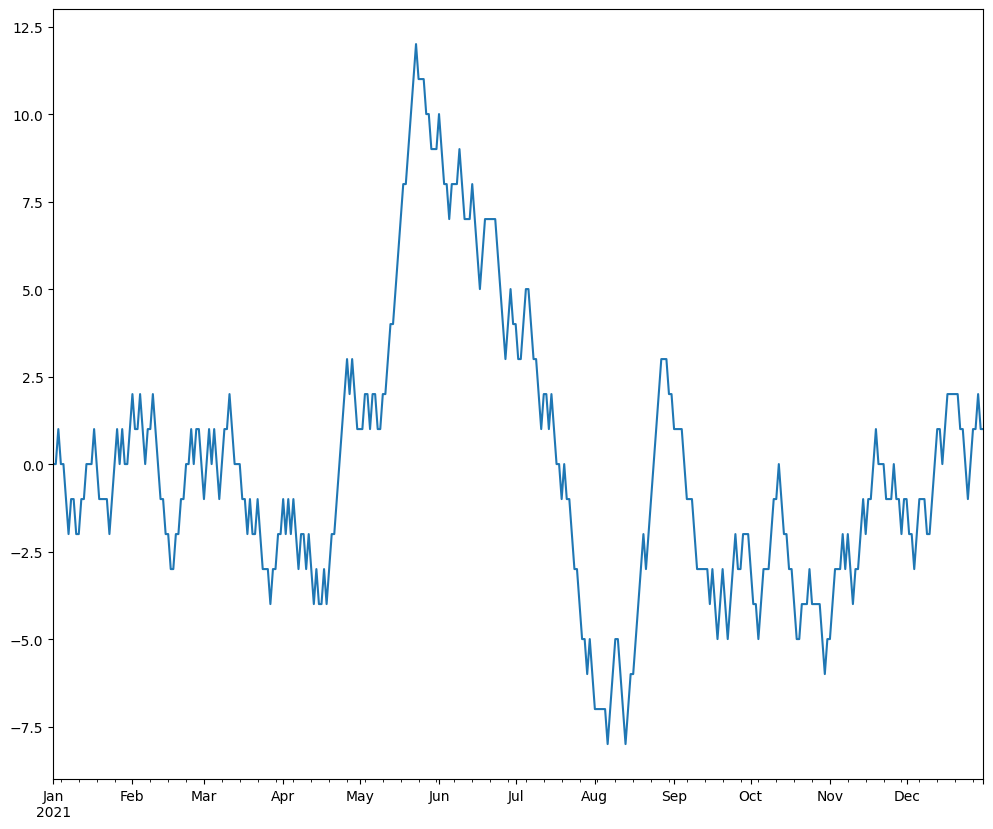

In [75]:
_ = ts.plot(figsize=(12, 10))

* Θα σβήσουμε πάλι τυχαία κάποια από τα δεδομένα (περίπου τα μισά).

In [76]:
nan_mask = np.where(np.random.randint(low=0, high=1+1, size=(365)) == 1, 0, np.nan)
ts = ts + nan_mask
print(ts.isna().sum())
ts

171


2021-01-01    0.0
2021-01-02    0.0
2021-01-03    1.0
2021-01-04    0.0
2021-01-05    NaN
             ... 
2021-12-27    NaN
2021-12-28    1.0
2021-12-29    NaN
2021-12-30    1.0
2021-12-31    1.0
Freq: D, Length: 365, dtype: float64

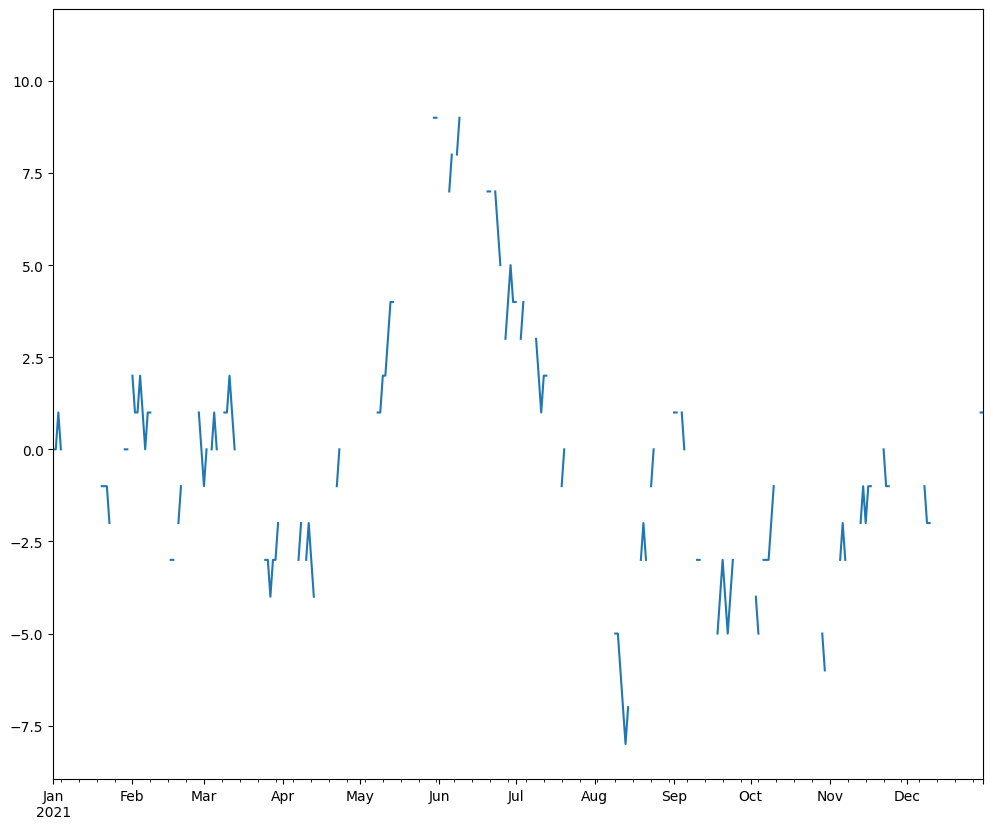

In [77]:
_ = ts.plot(figsize=(12, 10))

* Ιδού τι προκύπτει αν χρησιμοποιήσουμε γραμμική παρεμβολή με τη μέθοδο `interpolate()`.

In [78]:
ts = ts.interpolate()
ts

2021-01-01    0.000000
2021-01-02    0.000000
2021-01-03    1.000000
2021-01-04    0.000000
2021-01-05   -0.500000
                ...   
2021-12-27    0.333333
2021-12-28    1.000000
2021-12-29    1.000000
2021-12-30    1.000000
2021-12-31    1.000000
Freq: D, Length: 365, dtype: float64

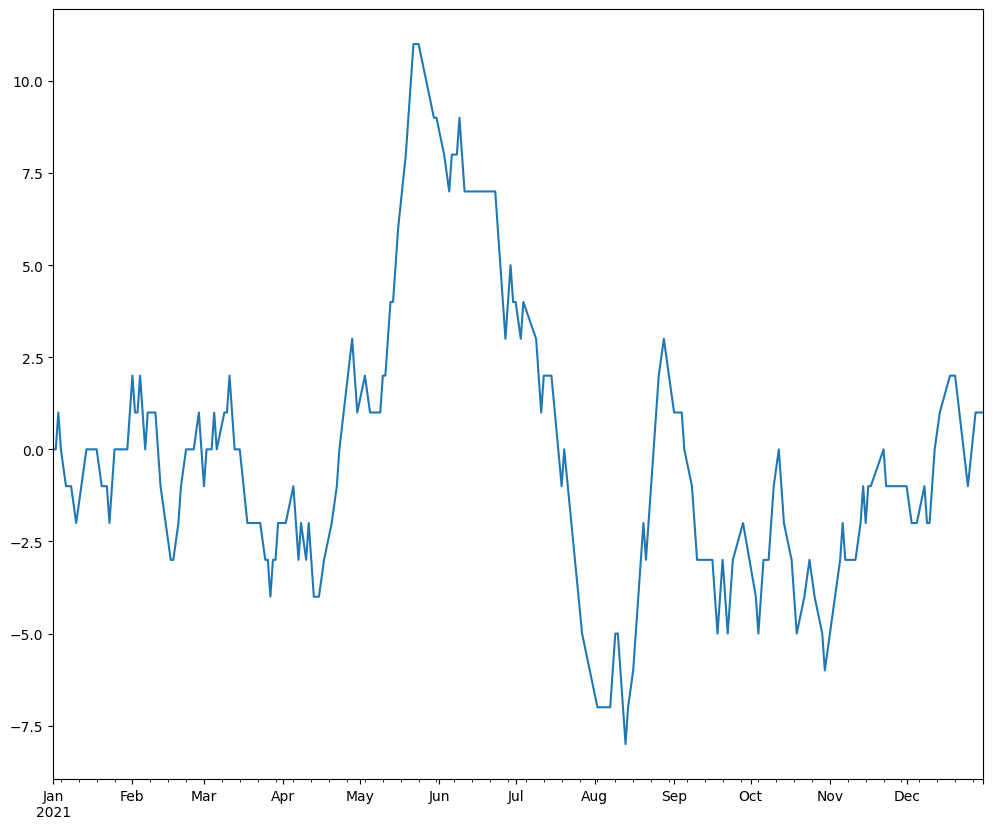

In [79]:
_ = ts.plot(figsize=(12, 10))

* Επιπλέον στρατηγικές για τον χειρισμό των δεδομένων με κενά δίνονται από τη βιβλιοθήκη [scikit-learn](https://scikit-learn.org/stable/), μέσω μηχανισμών *καταλογισμού* (imputation).

* Οι πιο απλές από αυτές δίνονται από την κλάση `SimpleImputer`, που προσφέρει τις εναλλακτικές:

  * `mean`

  * `median`

  * `most_frequent`

  * `constant`

In [80]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=0)

* Να επανέλθουμε στα δεδομένα από την Καλιφόρνια:

In [81]:
cal_housing

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,NaN,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,NaN,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,NaN,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,NaN,5.6431,341300.0
4,NaN,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,NaN,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,NaN,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,NaN,92300.0
20638,-121.32,39.43,NaN,1860.0,409.0,741.0,349.0,1.8672,84700.0


* Για να χρησιμοποιήσουμε έναν καταλογιστή του scikit-learn τα δεδομένα μας πρέπει να έχουν τη μορφή διδιάστατου πίνακα.

* Αυτό μπορούμε να το κάνουμε με την κλήση `reshape(-1, 1)` που σημαίνει «άλλαξε το σχήμα των δεδομένων σε μία στήλη και όσες γραμμές χρειάζεται».

In [82]:
cal_housing['totalBedrooms'].values.reshape(-1, 1)

array([[  nan],
       [1106.],
       [ 190.],
       ...,
       [ 485.],
       [ 409.],
       [ 616.]], shape=(20640, 1))

* Καλούμε τη μέθοδο `fit_transform()` του καταλογιστή μας:

In [83]:
imputer.fit_transform(cal_housing['totalBedrooms'].values.reshape(-1, 1))

array([[   0.],
       [1106.],
       [ 190.],
       ...,
       [ 485.],
       [ 409.],
       [ 616.]], shape=(20640, 1))

* Αντί για εισαγωγή μιας σταθερής τιμής, ας βάλουμε τη διάμεσο.

* Επίσης θα ζητήσουμε, δίνοντας `add_indicator=True`, να μας επιστραφεί και μία επιπλέον στήλη με τιμές 0 και 1, όπου η τιμή 1 σημαίνει ότι ο καταλογιστής εισήγαγε την τιμή σε αυτή τη γραμμή.

In [84]:
imputer = SimpleImputer(missing_values=np.nan, strategy="median", add_indicator=True)
imputer.fit_transform(cal_housing['totalBedrooms'].values.reshape(-1, 1))

array([[4.350e+02, 1.000e+00],
       [1.106e+03, 0.000e+00],
       [1.900e+02, 0.000e+00],
       ...,
       [4.850e+02, 0.000e+00],
       [4.090e+02, 0.000e+00],
       [6.160e+02, 0.000e+00]], shape=(20640, 2))

* Το scikit-learn προσφέρει και άλλους καταλογιστές:

  * `KNNImputer`
  
  * `IterativeImputer`

* Προσοχή! Το δυσκολότερο σημείο στη διαχείριση των κενών δεν είναι το τεχνικό.

* Βλέπουμε ότι υπάρχουν εργαλεία με τα οποία μπορούμε να τα χειριστούμε.

* Το δυσκολότερο σημείο είναι το επιχειρησιακό. Θέλουμε να διαγράψουμε δεδομένα, ή να γεμίσουμε τα κενά; Αν θέλουμε να γεμίσουμε τα κενά, με τι τιμές έχει νόημα να τα γεμίσουμε;

* Αν η πραγματικότητα έχει κενά, πρέπει να είμαστε σίγουροι ότι γεμίζοντάς τα δεν παραποιούμε την πραγματικότητα.